## Import Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.utils import resample
import matplotlib.pyplot as plt
import seaborn as sns
import math
import cv2
import csv
import datetime

## Load Data

In [2]:
new_merchant_data = pd.read_csv(r"G:\IIITD\SML\Project\elo_merchant_category\new_merchant_transactions.csv")
merchant_data = pd.read_csv(r"G:\IIITD\SML\Project\elo_merchant_category\merchants.csv")

## New Merchant Data

In [0]:
new_merchant_data.head(10)

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_415bb3a509,107,N,1,B,307,M_ID_b0c793002c,1,-0.557574,2018-03-11 14:57:36,1.0,9,19
1,Y,C_ID_415bb3a509,140,N,1,B,307,M_ID_88920c89e8,1,-0.569580,2018-03-19 18:53:37,1.0,9,19
2,Y,C_ID_415bb3a509,330,N,1,B,507,M_ID_ad5237ef6b,2,-0.551037,2018-04-26 14:08:44,1.0,9,14
3,Y,C_ID_415bb3a509,-1,Y,1,B,661,M_ID_9e84cda3b1,1,-0.671925,2018-03-07 09:43:21,NaN,-1,8
4,Y,C_ID_ef55cf8d4b,-1,Y,1,B,166,M_ID_3c86fa3831,1,-0.659904,2018-03-22 21:07:53,NaN,-1,29
5,Y,C_ID_ef55cf8d4b,231,N,1,B,367,M_ID_8874615e00,2,-0.633007,2018-04-02 12:53:28,1.0,9,16
6,Y,C_ID_ef55cf8d4b,69,N,1,B,333,M_ID_6d061b5ddc,1,5.263697,2018-03-28 19:50:19,1.0,9,10
7,Y,C_ID_ef55cf8d4b,231,N,1,B,307,M_ID_df1e022f41,2,-0.553787,2018-04-05 08:06:52,1.0,9,19
8,Y,C_ID_ef55cf8d4b,69,N,1,B,278,M_ID_d15eae0468,2,-0.596643,2018-04-07 18:37:40,1.0,9,37
9,Y,C_ID_ef55cf8d4b,69,N,1,B,437,M_ID_5f9bffd028,1,-0.607191,2018-03-17 18:10:41,1.0,9,15


## Merchant Data

In [0]:
merchant_data.head(10)

,merchant_id,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,...,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
0,M_ID_838061e48c,8353,792,9,-0.057471,-0.057471,N,E,E,-0.40,...,-2.25,18.666667,6,-2.32,13.916667,12,N,242,9,1.0
1,M_ID_9339d880ad,3184,840,20,-0.057471,-0.057471,N,E,E,-0.72,...,-0.74,1.291667,6,-0.57,1.687500,12,N,22,16,1.0
2,M_ID_e726bbae1e,447,690,1,-0.057471,-0.057471,N,E,E,-82.13,...,-82.13,260.000000,2,-82.13,260.000000,2,N,-1,5,5.0
3,M_ID_a70e9c5f81,5026,792,9,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,4.666667,6,NaN,3.833333,12,Y,-1,-1,NaN
4,M_ID_64456c37ce,2228,222,21,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,0.361111,6,NaN,0.347222,12,Y,-1,-1,NaN
5,M_ID_a0915f62b5,20201,87,27,-0.057471,-0.057471,N,E,E,NaN,...,NaN,3.666667,6,NaN,3.833333,12,Y,160,21,5.0
6,M_ID_bfd41933db,33861,792,9,-0.057471,-0.057471,N,E,E,NaN,...,NaN,4.833333,6,NaN,6.333333,12,N,60,16,1.0
7,M_ID_d8ff08219e,16430,529,20,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,1.666667,6,NaN,1.500000,11,Y,-1,-1,NaN
8,M_ID_c5b389236d,37179,813,29,-0.057471,-0.057471,N,E,E,NaN,...,NaN,189.916667,6,NaN,197.000000,7,N,248,15,1.0
9,M_ID_d2162ed113,112122,81,29,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,1.000000,2,NaN,1.000000,2,Y,-1,-1,NaN


## Merge merchant data with the new merchant transaction data

In [3]:
# Merge merchant data with new merchant data

merged_merchant = pd.merge(new_merchant_data, merchant_data, on = ['merchant_id'], how = 'left')
print(merged_merchant.shape)

(1994895, 35)


In [4]:
merged_merchant.head(10)

,authorized_flag,card_id,city_id_x,category_1_x,installments,category_3,merchant_category_id_x,merchant_id,month_lag,purchase_amount,...,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id_y,state_id_y,category_2_y
0,Y,C_ID_415bb3a509,107,N,1,B,307,M_ID_b0c793002c,1,-0.557574,...,0.82,1.158625,6.0,0.81,1.235863,12.0,N,-1.0,9.0,1.0
1,Y,C_ID_415bb3a509,140,N,1,B,307,M_ID_88920c89e8,1,-0.569580,...,1.13,1.088138,6.0,1.13,1.102611,12.0,N,140.0,9.0,1.0
2,Y,C_ID_415bb3a509,330,N,1,B,507,M_ID_ad5237ef6b,2,-0.551037,...,1.03,1.055851,6.0,1.05,1.063897,12.0,N,-1.0,9.0,1.0
3,Y,C_ID_415bb3a509,-1,Y,1,B,661,M_ID_9e84cda3b1,1,-0.671925,...,1.11,1.177485,6.0,1.04,1.066582,12.0,Y,-1.0,-1.0,NaN
4,Y,C_ID_ef55cf8d4b,-1,Y,1,B,166,M_ID_3c86fa3831,1,-0.659904,...,0.68,0.653999,6.0,0.47,0.414029,12.0,Y,-1.0,-1.0,NaN
5,Y,C_ID_ef55cf8d4b,231,N,1,B,367,M_ID_8874615e00,2,-0.633007,...,1.00,0.979414,6.0,0.95,0.935607,12.0,N,231.0,9.0,1.0
6,Y,C_ID_ef55cf8d4b,69,N,1,B,333,M_ID_6d061b5ddc,1,5.263697,...,2.03,1.400000,6.0,2.12,1.600000,12.0,Y,69.0,9.0,1.0
7,Y,C_ID_ef55cf8d4b,231,N,1,B,307,M_ID_df1e022f41,2,-0.553787,...,0.97,1.052896,6.0,0.89,1.040706,12.0,N,231.0,9.0,1.0
8,Y,C_ID_ef55cf8d4b,69,N,1,B,278,M_ID_d15eae0468,2,-0.596643,...,0.87,0.828014,6.0,1.46,1.308067,12.0,Y,69.0,9.0,1.0
9,Y,C_ID_ef55cf8d4b,69,N,1,B,437,M_ID_5f9bffd028,1,-0.607191,...,0.99,1.007866,6.0,1.06,1.049198,12.0,Y,69.0,9.0,1.0


## Feature Engineering (Merchant Data)

In [5]:
merged_merchant.isnull().sum()

authorized_flag                     0
card_id                             0
city_id_x                           0
category_1_x                        0
installments                        0
category_3                      55985
merchant_category_id_x              0
merchant_id                     26216
month_lag                           0
purchase_amount                     0
purchase_date                       0
category_2_x                   114948
state_id_x                          0
subsector_id_x                      0
merchant_group_id               26216
merchant_category_id_y          26216
subsector_id_y                  26216
numerical_1                     26216
numerical_2                     26216
category_1_y                    26216
most_recent_sales_range         26216
most_recent_purchases_range     26216
avg_sales_lag3                  26550
avg_purchases_lag3              26216
active_months_lag3              26216
avg_sales_lag6                  26550
avg_purchase

In [0]:
print("Feature dtypes \n")
print(merged_merchant.dtypes)

Feature dtypes 

authorized_flag                 object
card_id                         object
city_id_x                        int64
category_1_x                    object
installments                     int64
category_3                      object
merchant_category_id_x           int64
merchant_id                     object
month_lag                        int64
purchase_amount                float64
purchase_date                   object
category_2_x                   float64
state_id_x                       int64
subsector_id_x                   int64
merchant_group_id              float64
merchant_category_id_y         float64
subsector_id_y                 float64
numerical_1                    float64
numerical_2                    float64
category_1_y                    object
most_recent_sales_range         object
most_recent_purchases_range     object
avg_sales_lag3                 float64
avg_purchases_lag3             float64
active_months_lag3             float64
avg_sale

## Replacing Null and Infinity values

In [6]:
mode_value_y = list(merged_merchant['category_2_y'].mode())
merged_merchant['category_2_y'].fillna(mode_value_y[0], inplace = True)

merged_merchant['avg_sales_lag3'] = merged_merchant['avg_sales_lag3'].fillna(0).astype(int)
merged_merchant['avg_sales_lag6'] = merged_merchant['avg_sales_lag6'].fillna(0).astype(int)
merged_merchant['avg_sales_lag12'] = merged_merchant['avg_sales_lag12'].fillna(0).astype(int)

In [7]:
max_value = merged_merchant['avg_purchases_lag3'].max()
min_value = merged_merchant['avg_purchases_lag3'].min()
print(min_value)
print(max_value)

0.33349533
61851.33333333


In [8]:
merged_merchant['avg_purchases_lag3'] = merged_merchant['avg_purchases_lag3'].replace(np.inf, 0)
merged_merchant['avg_purchases_lag6'] = merged_merchant['avg_purchases_lag6'].replace(np.inf, 0)
merged_merchant['avg_purchases_lag12'] = merged_merchant['avg_purchases_lag12'].replace(np.inf, 0)

max_lag3 = merged_merchant['avg_purchases_lag3'].max()
max_lag6 = merged_merchant['avg_purchases_lag6'].max()
max_lag12 = merged_merchant['avg_purchases_lag12'].max()

merged_merchant.loc[merged_merchant['avg_purchases_lag3'] == 0, 'avg_purchases_lag3'] = max_lag3
merged_merchant.loc[merged_merchant['avg_purchases_lag6'] == 0, 'avg_purchases_lag6'] = max_lag6
merged_merchant.loc[merged_merchant['avg_purchases_lag12'] == 0, 'avg_purchases_lag12'] = max_lag12

## Replacing the Merchant Data according to New Merchant Data

In [9]:
merged_merchant['category_1_y'] = merged_merchant['category_1_y'].fillna(merged_merchant['category_1_x'])
merged_merchant['city_id_y'] = merged_merchant['city_id_y'].fillna(merged_merchant['city_id_x'])
merged_merchant['state_id_y'] = merged_merchant['state_id_y'].fillna(merged_merchant['state_id_x'])
merged_merchant['subsector_id_y'] = merged_merchant['subsector_id_y'].fillna(merged_merchant['subsector_id_x'])
merged_merchant['merchant_category_id_y'] = merged_merchant['merchant_category_id_y'].fillna(merged_merchant['merchant_category_id_x'])

## Replacing Values with Mean and Mode

In [10]:
merged_merchant['numerical_1'] = merged_merchant['numerical_1'].fillna(merged_merchant['numerical_1'].mean())
merged_merchant['numerical_2'] = merged_merchant['numerical_2'].fillna(merged_merchant['numerical_2'].mean())

merged_merchant['avg_purchases_lag3'].fillna(merged_merchant['avg_purchases_lag3'].mean(), inplace = True)
merged_merchant['avg_purchases_lag6'].fillna(merged_merchant['avg_purchases_lag6'].mean(), inplace = True)
merged_merchant['avg_purchases_lag12'].fillna(merged_merchant['avg_purchases_lag12'].mean(), inplace = True)

In [11]:
merged_merchant['active_months_lag3'].fillna(merged_merchant['active_months_lag3'].mode()[0], inplace=True)
merged_merchant['active_months_lag6'].fillna(merged_merchant['active_months_lag6'].mode()[0], inplace=True)
merged_merchant['active_months_lag12'].fillna(merged_merchant['active_months_lag12'].mode()[0], inplace=True)

merged_merchant['category_3'].fillna(merged_merchant['category_3'].mode()[0], inplace=True)
merged_merchant['merchant_id'].fillna(merged_merchant['merchant_id'].mode()[0], inplace=True)

## Mapping Values

In [12]:
merged_merchant['most_recent_sales_range'] = merged_merchant['most_recent_sales_range'].map({'A':1,'B':2,'C':3,'D':4,'E':5})
merged_merchant['most_recent_purchases_range'] = merged_merchant['most_recent_purchases_range'].map({'A':1,'B':2,'C':3,'D':4,'E':5})

In [13]:
merged_merchant['most_recent_sales_range'].fillna(merged_merchant['most_recent_sales_range'].mode()[0], inplace=True)
merged_merchant['most_recent_purchases_range'].fillna(merged_merchant['most_recent_purchases_range'].mode()[0], inplace=True)
merged_merchant['merchant_group_id'].fillna(merged_merchant['merchant_group_id'].mode()[0], inplace=True)

In [14]:
merged_merchant['category_4'] = merged_merchant['category_4'].map({'Y': 1 , 'N': 0})
merged_merchant['category_4'].fillna(merged_merchant['category_4'].mode()[0], inplace=True)
merged_merchant['category_2_x'].fillna(merged_merchant['category_2_x'].mode()[0], inplace=True)

In [15]:
print("Number of Observations and Features in the Merchant Data are", merchant_data.shape)
print(merged_merchant.isnull().sum())

Number of Observations and Features in the Merchant Data are (334696, 22)
authorized_flag                0
card_id                        0
city_id_x                      0
category_1_x                   0
installments                   0
category_3                     0
merchant_category_id_x         0
merchant_id                    0
month_lag                      0
purchase_amount                0
purchase_date                  0
category_2_x                   0
state_id_x                     0
subsector_id_x                 0
merchant_group_id              0
merchant_category_id_y         0
subsector_id_y                 0
numerical_1                    0
numerical_2                    0
category_1_y                   0
most_recent_sales_range        0
most_recent_purchases_range    0
avg_sales_lag3                 0
avg_purchases_lag3             0
active_months_lag3             0
avg_sales_lag6                 0
avg_purchases_lag6             0
active_months_lag6             0
av

## Feature Engineering (Merged Data)

In [16]:
new_features = pd.DataFrame()

In [17]:
## Replace  categorical values with unique value
merged_merchant['category_1_x'] = merged_merchant['category_1_x'].map({'Y': 1, 'N': 0})
merged_merchant['category_1_y'] = merged_merchant['category_1_y'].map({'Y': 1, 'N': 0})
merged_merchant['authorized_flag'] = merged_merchant['authorized_flag'].map({'Y':1, 'N':0})
# Y = 1, N = 0

In [18]:
## Analyze the purchase data column
merged_merchant['purchase_date'] = pd.to_datetime(merged_merchant['purchase_date'])

merged_merchant['month_diff'] = ((datetime.datetime.today() - merged_merchant['purchase_date']).dt.days)//30
merged_merchant['month_diff'] += merged_merchant['month_lag']

In [19]:
merged_merchant = pd.get_dummies(merged_merchant, columns=['category_2_x', 'category_3', 'most_recent_sales_range',
                                                          'most_recent_purchases_range','category_2_y' ])

In [20]:
merged_merchant.columns

Index(['authorized_flag', 'card_id', 'city_id_x', 'category_1_x',
       'installments', 'merchant_category_id_x', 'merchant_id', 'month_lag',
       'purchase_amount', 'purchase_date', 'state_id_x', 'subsector_id_x',
       'merchant_group_id', 'merchant_category_id_y', 'subsector_id_y',
       'numerical_1', 'numerical_2', 'category_1_y', 'avg_sales_lag3',
       'avg_purchases_lag3', 'active_months_lag3', 'avg_sales_lag6',
       'avg_purchases_lag6', 'active_months_lag6', 'avg_sales_lag12',
       'avg_purchases_lag12', 'active_months_lag12', 'category_4', 'city_id_y',
       'state_id_y', 'month_diff', 'category_2_x_1.0', 'category_2_x_2.0',
       'category_2_x_3.0', 'category_2_x_4.0', 'category_2_x_5.0',
       'category_3_A', 'category_3_B', 'category_3_C',
       'most_recent_sales_range_1.0', 'most_recent_sales_range_2.0',
       'most_recent_sales_range_3.0', 'most_recent_sales_range_4.0',
       'most_recent_sales_range_5.0', 'most_recent_purchases_range_1.0',
       'most

In [21]:
def new_aggregate_cols(df, prefix):
    agg_func = {
        'authorized_flag': ['sum','mean'],
        'category_1_x': ['sum','mean'],
        'category_1_y': ['sum', 'mean'],
        'category_2_x_1.0': ['sum','mean'],
        'category_2_x_2.0': ['sum','mean'],
        'category_2_x_3.0': ['sum','mean'],
        'category_2_x_4.0': ['sum','mean'],
        'category_2_x_5.0': ['sum','mean'],
        'category_3_A': ['sum','mean'],
        'category_3_B': ['sum','mean'],
        'category_3_C': ['sum','mean'],
        'merchant_id': ['nunique','count'],
        'purchase_amount': ['sum','mean','std'],
        'installments': ['sum','mean','std'],
        'month_lag': ['sum','mean','min','max','std'],
        'city_id_x': ['nunique'],
        'city_id_y': ['nunique'],
        'subsector_id_x': ['nunique'],
        'subsector_id_y': ['nunique'],
        'numerical_1':  ['sum', 'mean'],
        'numerical_2':  ['sum', 'mean'],
        
        'avg_sales_lag3': ['sum', 'mean'],
        'avg_purchases_lag3': ['sum', 'mean'],
        'active_months_lag3' : ['max'],
        'avg_sales_lag6': ['sum', 'mean'],
        'avg_purchases_lag6': ['sum', 'mean'],
        'active_months_lag6' : ['max'],
        'avg_sales_lag12': ['sum', 'mean'],
        'avg_purchases_lag12': ['sum', 'mean'],
        'active_months_lag12' : ['max'],
        
        'category_4': ['sum', 'mean'],
        'month_diff': ['max', 'min'],
            
        'most_recent_sales_range_1.0': ['sum', 'mean'],
        'most_recent_sales_range_2.0': ['sum', 'mean'],
        'most_recent_sales_range_3.0': ['sum', 'mean'],
        'most_recent_sales_range_4.0': ['sum', 'mean'],
        'most_recent_sales_range_5.0': ['sum', 'mean'],
        
        'most_recent_purchases_range_1.0': ['sum', 'mean'],
        'most_recent_purchases_range_2.0': ['sum', 'mean'],
        'most_recent_purchases_range_3.0': ['sum', 'mean'],
        'most_recent_purchases_range_4.0': ['sum', 'mean'],
        'most_recent_purchases_range_5.0': ['sum', 'mean'],
        
        'category_2_y_1.0': ['sum','mean'],
        'category_2_y_2.0': ['sum','mean'],
        'category_2_y_3.0': ['sum','mean'],
        'category_2_y_4.0': ['sum','mean'],
        'category_2_y_5.0': ['sum','mean'],
        
    }
    agg_df = df.groupby(['card_id']).agg(agg_func)
    agg_df.columns = [prefix + '_'.join(col).strip() for col in agg_df.columns.values]
    agg_df.reset_index(inplace=True)
    
    df1 = (df.groupby('card_id').size().reset_index(name='{}transactions_count'.format(prefix)))
    
    agg_df = pd.merge(df1, agg_df, on='card_id', how='left')
    return agg_df

In [22]:
merged_merchant_data = new_aggregate_cols(merged_merchant, prefix='merged_')
merged_merchant_data.head()

,card_id,merged_transactions_count,merged_authorized_flag_sum,merged_authorized_flag_mean,merged_category_1_x_sum,merged_category_1_x_mean,merged_category_1_y_sum,merged_category_1_y_mean,merged_category_2_x_1.0_sum,merged_category_2_x_1.0_mean,...,merged_category_2_y_1.0_sum,merged_category_2_y_1.0_mean,merged_category_2_y_2.0_sum,merged_category_2_y_2.0_mean,merged_category_2_y_3.0_sum,merged_category_2_y_3.0_mean,merged_category_2_y_4.0_sum,merged_category_2_y_4.0_mean,merged_category_2_y_5.0_sum,merged_category_2_y_5.0_mean
0,C_ID_00007093c1,3,3,1,0,0.000000,2,0.666667,2,0.666667,...,2,0.666667,0,0.000000,1,0.333333,0,0.0,0,0.000000
1,C_ID_0001238066,27,27,1,2,0.074074,6,0.222222,24,0.888889,...,24,0.888889,0,0.000000,0,0.000000,0,0.0,3,0.111111
2,C_ID_0001506ef0,2,2,1,0,0.000000,0,0.000000,0,0.000000,...,1,0.500000,0,0.000000,1,0.500000,0,0.0,0,0.000000
3,C_ID_0001793786,31,31,1,0,0.000000,4,0.129032,17,0.548387,...,16,0.516129,10,0.322581,5,0.161290,0,0.0,0,0.000000
4,C_ID_000183fdda,11,11,1,0,0.000000,0,0.000000,0,0.000000,...,0,0.000000,0,0.000000,11,1.000000,0,0.0,0,0.000000


## Train Data

In [45]:
train_data = pd.read_csv(r"G:\IIITD\SML\Project\elo_merchant_category\train.csv", parse_dates=['first_active_month'])
feature1 = train_data['feature_1']
feature2 = train_data['feature_2']
feature3 = train_data['feature_3']
target = train_data['target']
train_data.head(10)

,first_active_month,card_id,feature_1,feature_2,feature_3,target
0,2017-06-01,C_ID_92a2005557,5,2,1,-0.820283
1,2017-01-01,C_ID_3d0044924f,4,1,0,0.392913
2,2016-08-01,C_ID_d639edf6cd,2,2,0,0.688056
3,2017-09-01,C_ID_186d6a6901,4,3,0,0.142495
4,2017-11-01,C_ID_cdbd2c0db2,1,3,0,-0.159749
5,2016-09-01,C_ID_0894217f2f,4,2,0,0.871585
6,2016-12-01,C_ID_7e63323c00,3,2,1,0.230129
7,2017-09-01,C_ID_dfa21fc124,3,2,1,2.135850
8,2017-08-01,C_ID_fe0fdac8ea,2,1,0,-0.065406
9,2016-08-01,C_ID_bf62c0b49d,2,2,0,0.300062


In [46]:
train_data.isnull().sum()

first_active_month    0
card_id               0
feature_1             0
feature_2             0
feature_3             0
target                0
dtype: int64

In [47]:
print("Feature dtypes \n")
print(train_data.dtypes)

Feature dtypes 

first_active_month    datetime64[ns]
card_id                       object
feature_1                      int64
feature_2                      int64
feature_3                      int64
target                       float64
dtype: object


In [48]:
print("Unique Feature by values")
print(train_data.nunique())

Unique Feature by values
first_active_month        75
card_id               201917
feature_1                  5
feature_2                  3
feature_3                  2
target                197110
dtype: int64


In [49]:
print(train_data.shape)

(201917, 6)


## Feature Engineering (Train Data)

In [42]:
outliers = train_data.loc[train_data['target'] < -30]
train_data = train_data.loc[train_data['target'] >= -30]

In [50]:
print(train_data.shape)

(201917, 6)


In [51]:
# Generate new features in the training dataset

target = train_data['target'].to_list()
train_data.drop(["target"], axis = 1, inplace = True)
max_date = train_data['first_active_month'].dt.date.max()
print(max_date)

active_days = []
days = list(max_date - train_data['first_active_month'].dt.date)
for values in days:
    
    value = str(values)
    data = value.split(" ")
    active_days.append(int(data[0]))

train_data['active_days'] = active_days
train_data['feature_sum'] = train_data['feature_1'] + train_data['feature_2'] + train_data['feature_3']
train_data['feature_mean'] = train_data['feature_sum']/3
train_data['feature_max'] = train_data[['feature_1', 'feature_2', 'feature_3']].max(axis=1)
train_data['feature_min'] = train_data[['feature_1', 'feature_2', 'feature_3']].min(axis=1)
train_data['feature_var'] = train_data[['feature_1', 'feature_2', 'feature_3']].std(axis=1)
train_data['quarter'] = (train_data['first_active_month'].dt.quarter)
train_data['target'] = target

2018-02-01


In [52]:
train_data.drop(['first_active_month'], axis = 1, inplace = True)

In [53]:
print(train_data.columns)

Index(['card_id', 'feature_1', 'feature_2', 'feature_3', 'active_days',
       'feature_sum', 'feature_mean', 'feature_max', 'feature_min',
       'feature_var', 'quarter', 'target'],
      dtype='object')


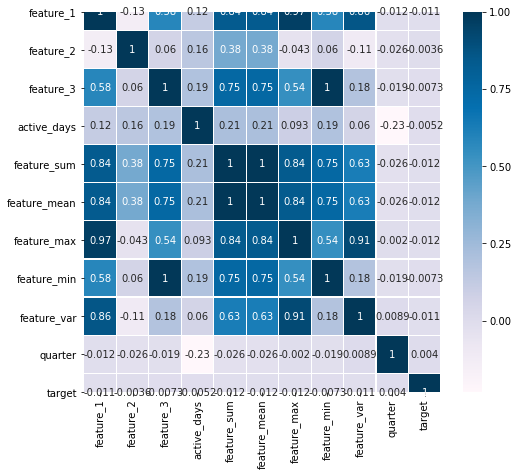

In [0]:
def updatedtrain_heat_map(train_data):
    
    Correlation_Matrix = train_data.corr()
    f, ax = plt.subplots(figsize =(8, 7)) 

    sns.heatmap(Correlation_Matrix, 
                ax = ax, 
                cmap ="PuBu",
                linewidths = 0.1,
                annot = True,
                annot_kws = {"size": 10}
               )
    ax.set_yticklabels(Correlation_Matrix.columns)
    ax.set_xticklabels(Correlation_Matrix.columns)
    sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

updatedtrain_heat_map(train_data)

In [0]:
def select_KBest(train_data):
    
    columns = len(train_data.columns)
    
    X = train_data.iloc[:, 2:columns - 1 ] 
    print(X.columns)
    Y = train_data.iloc[:,-1]
    Y = Y.astype('int')
    
    Features = SelectKBest(score_func = chi2, k = 2)
    model = Features.fit(X,Y)
    
    dfscores = pd.DataFrame(model.scores_)
    dfcolumns = pd.DataFrame(X.columns)
    
    featureScores = pd.concat([dfcolumns, dfscores], axis = 1)
    featureScores.columns = ['Feature','Score']  
    x = featureScores.nlargest(2,'Score')
    print(x)
    
select_KBest(train_data)

Index(['feature_2', 'feature_3', 'active_days', 'feature_sum', 'feature_mean',
       'feature_max', 'feature_min', 'feature_var', 'quarter'],
      dtype='object')
       Feature          Score
2  active_days  135927.029963
8      quarter     187.376159


# Feature Engineering - Historical Data

In [ ]:
historical = pd.read_csv("/kaggle/input/elo-merchant-category-recommendation/historical_transactions.csv")
historical.head(5)

In [ ]:
new_features = pd.DataFrame()

In [ ]:
## Replace null values with mode value
historical['category_2'].fillna(historical['category_2'].mode()[0], inplace=True)
historical['category_3'].fillna(historical['category_3'].mode()[0], inplace=True)
historical['merchant_id'].fillna(historical['merchant_id'].mode()[0], inplace=True)

## Replace  categorical values with unique value
historical['category_1'] = historical['category_1'].map({'Y': 1, 'N': 0})
historical['authorized_flag'] = historical['authorized_flag'].map({'Y':1, 'N':0})
# Y = 1, N = 0

In [ ]:
## Analyze the purchase data column
historical['purchase_date'] = pd.to_datetime(historical['purchase_date'])

historical['month_diff'] = ((datetime.datetime.today() - historical['purchase_date']).dt.days)//30
historical['month_diff'] += historical['month_lag']

In [ ]:
historical = pd.get_dummies(historical,columns=['category_2', 'category_3'])

In [ ]:
def new_aggregate_cols(df, prefix):
    agg_func = {
        'authorized_flag': ['sum','mean'],
        'category_1': ['sum','mean'],
        'category_2_1.0': ['sum','mean'],
        'category_2_2.0': ['sum','mean'],
        'category_2_3.0': ['sum','mean'],
        'category_2_4.0': ['sum','mean'],
        'category_2_5.0': ['sum','mean'],
        'category_3_A': ['sum','mean'],
        'category_3_B': ['sum','mean'],
        'category_3_C': ['sum','mean'],
        'merchant_id': ['nunique','count'],
        'purchase_amount': ['sum','mean','min','max','std'],
        'installments': ['sum','mean','min','max','std'],
        'month_lag': ['sum','mean','min','max','std'],
        'city_id': ['nunique'],
        'subsector_id':['nunique']
        
    }
    agg_df = df.groupby(['card_id']).agg(agg_func)
    agg_df.columns = [prefix + '_'.join(col).strip() for col in agg_df.columns.values]
    agg_df.reset_index(inplace=True)
    
    df1 = (df.groupby('card_id').size().reset_index(name='{}transactions_count'.format(prefix)))
    
    agg_df = pd.merge(df1, agg_df, on='card_id', how='left')
    return agg_df

In [ ]:
historical_data = new_aggregate_cols(historical, prefix='hist_')
historical_data.head()

In [ ]:
historical_data.to_csv("/kaggle/working/historical_features.csv")

## Combine historical data and new features generated from merging the merchant and new merchant transaction data into the training dataset 

In [30]:
historical_data = pd.read_csv(r"G:\IIITD\SML\Project\elo_merchant_category\historical_features.csv")
historical_data.head()

In [54]:
print(merged_merchant_data.shape)
print(historical_data.shape)
print(train_data.shape)

(290001, 94)
(325540, 42)
(201917, 12)


In [55]:
train_data = pd.merge(train_data, historical_data, on=['card_id'], how='left')
train_data = pd.merge(train_data, merged_merchant_data, on=['card_id'], how='left')

In [56]:
# Replace all null values with 0
train_data.fillna(0, inplace=True)

In [57]:
print(train_data.shape)

(201917, 146)


In [58]:
train_data.head(10)

,card_id,feature_1,feature_2,feature_3,active_days,feature_sum,feature_mean,feature_max,feature_min,feature_var,...,merged_category_2_y_1.0_sum,merged_category_2_y_1.0_mean,merged_category_2_y_2.0_sum,merged_category_2_y_2.0_mean,merged_category_2_y_3.0_sum,merged_category_2_y_3.0_mean,merged_category_2_y_4.0_sum,merged_category_2_y_4.0_mean,merged_category_2_y_5.0_sum,merged_category_2_y_5.0_mean
0,C_ID_92a2005557,5,2,1,245,8,2.666667,5,1,2.081666,...,23.0,1.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0
1,C_ID_3d0044924f,4,1,0,396,5,1.666667,4,0,2.081666,...,6.0,1.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0
2,C_ID_d639edf6cd,2,2,0,549,4,1.333333,2,0,1.154701,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,1.0,1.0
3,C_ID_186d6a6901,4,3,0,153,7,2.333333,4,0,2.081666,...,1.0,0.142857,0.0,0.000000,0.0,0.000000,6.0,0.857143,0.0,0.0
4,C_ID_cdbd2c0db2,1,3,0,92,4,1.333333,3,0,1.527525,...,5.0,0.138889,0.0,0.000000,7.0,0.194444,24.0,0.666667,0.0,0.0
5,C_ID_0894217f2f,4,2,0,518,6,2.000000,4,0,2.000000,...,4.0,1.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0
6,C_ID_7e63323c00,3,2,1,427,6,2.000000,3,1,1.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,5.0,1.0
7,C_ID_dfa21fc124,3,2,1,153,6,2.000000,3,1,1.000000,...,1.0,0.333333,2.0,0.666667,0.0,0.000000,0.0,0.000000,0.0,0.0
8,C_ID_fe0fdac8ea,2,1,0,184,3,1.000000,2,0,1.000000,...,2.0,1.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0
9,C_ID_bf62c0b49d,2,2,0,549,4,1.333333,2,0,1.154701,...,3.0,1.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0


In [60]:
# train_data.to_csv(r"G:\IIITD\SML\Project\elo_merchant_category\train_final_features.csv")

## Test Data

In [23]:
test_data = pd.read_csv(r"G:\IIITD\SML\Project\elo_merchant_category\test.csv", parse_dates=['first_active_month'])
feature1 = test_data['feature_1']
feature2 = test_data['feature_2']
feature3 = test_data['feature_3']
test_data.head(10)

,first_active_month,card_id,feature_1,feature_2,feature_3
0,2017-04-01,C_ID_0ab67a22ab,3,3,1
1,2017-01-01,C_ID_130fd0cbdd,2,3,0
2,2017-08-01,C_ID_b709037bc5,5,1,1
3,2017-12-01,C_ID_d27d835a9f,2,1,0
4,2015-12-01,C_ID_2b5e3df5c2,5,1,1
5,2017-07-01,C_ID_5814b4f13c,5,1,1
6,2017-10-01,C_ID_a1b3c75277,1,2,0
7,2017-02-01,C_ID_f7cada36d3,3,1,1
8,2017-07-01,C_ID_9d2bc8dfc4,4,3,0
9,2016-03-01,C_ID_6d8dba8475,5,1,1


In [24]:
# Generate new features from the testing dataset

max_date = test_data.first_active_month.max()
print(max_date)

active_days = []
days = list(max_date - test_data.first_active_month)
for values in days:
    
    value = str(values)
    data = value.split(" ")
    if(data[0] == 'NaT'):
        active_days.append(0)
    else:
        active_days.append(int(data[0]))

test_data['active_days'] = active_days
test_data['feature_sum'] = test_data['feature_1'] + test_data['feature_2'] + test_data['feature_3']
test_data['feature_mean'] = test_data['feature_sum']/3
test_data['feature_max'] = test_data[['feature_1', 'feature_2', 'feature_3']].max(axis=1)
test_data['feature_min'] = test_data[['feature_1', 'feature_2', 'feature_3']].min(axis=1)
test_data['feature_var'] = test_data[['feature_1', 'feature_2', 'feature_3']].std(axis=1)
test_data['quarter'] = (test_data['first_active_month'].dt.quarter)

2018-01-01 00:00:00


In [25]:
print("Feature dtypes \n")
print(test_data.dtypes)

Feature dtypes 

first_active_month    datetime64[ns]
card_id                       object
feature_1                      int64
feature_2                      int64
feature_3                      int64
active_days                    int64
feature_sum                    int64
feature_mean                 float64
feature_max                    int64
feature_min                    int64
feature_var                  float64
quarter                      float64
dtype: object


In [26]:
test_data.drop(['first_active_month'], axis = 1, inplace = True)

In [27]:
print(test_data.columns)

Index(['card_id', 'feature_1', 'feature_2', 'feature_3', 'active_days',
       'feature_sum', 'feature_mean', 'feature_max', 'feature_min',
       'feature_var', 'quarter'],
      dtype='object')


## Combine historical data and new features generated from merging the merchant and new merchant transaction data into the test dataset  

In [32]:
test_data = pd.merge(test_data, historical_data, on=['card_id'], how='left')
test_data = pd.merge(test_data, merged_merchant_data, on=['card_id'], how='left')

In [33]:
test_data.fillna(0, inplace=True)

In [34]:
print(test_data.shape)

(123623, 145)


In [35]:
test_data.head(10)

,card_id,feature_1,feature_2,feature_3,active_days,feature_sum,feature_mean,feature_max,feature_min,feature_var,...,merged_category_2_y_1.0_sum,merged_category_2_y_1.0_mean,merged_category_2_y_2.0_sum,merged_category_2_y_2.0_mean,merged_category_2_y_3.0_sum,merged_category_2_y_3.0_mean,merged_category_2_y_4.0_sum,merged_category_2_y_4.0_mean,merged_category_2_y_5.0_sum,merged_category_2_y_5.0_mean
0,C_ID_0ab67a22ab,3,3,1,275,7,2.333333,3,1,1.154701,...,3.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
1,C_ID_130fd0cbdd,2,3,0,365,5,1.666667,3,0,1.527525,...,3.0,0.300000,0.0,0.0,0.0,0.0,7.0,0.700000,0.0,0.000000
2,C_ID_b709037bc5,5,1,1,153,7,2.333333,5,1,2.309401,...,1.0,0.500000,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.500000
3,C_ID_d27d835a9f,2,1,0,31,3,1.000000,2,0,1.000000,...,10.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
4,C_ID_2b5e3df5c2,5,1,1,762,7,2.333333,5,1,2.309401,...,0.0,0.000000,0.0,0.0,0.0,0.0,6.0,1.000000,0.0,0.000000
5,C_ID_5814b4f13c,5,1,1,184,7,2.333333,5,1,2.309401,...,0.0,0.000000,0.0,0.0,1.0,1.0,0.0,0.000000,0.0,0.000000
6,C_ID_a1b3c75277,1,2,0,92,3,1.000000,2,0,1.000000,...,1.0,0.111111,0.0,0.0,0.0,0.0,1.0,0.111111,7.0,0.777778
7,C_ID_f7cada36d3,3,1,1,334,5,1.666667,3,1,1.154701,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
8,C_ID_9d2bc8dfc4,4,3,0,184,7,2.333333,4,0,2.081666,...,1.0,0.500000,0.0,0.0,1.0,0.5,0.0,0.000000,0.0,0.000000
9,C_ID_6d8dba8475,5,1,1,671,7,2.333333,5,1,2.309401,...,9.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000


In [36]:
test_data.to_csv(r"G:\IIITD\SML\Project\elo_merchant_category\test_final_features.csv")